<a href="https://colab.research.google.com/github/Vaibhavkirtankar/Projects/blob/main/Quora_Question_Pairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('train.csv',engine='python')
df.shape

(404290, 6)

In [ ]:
df['question1'][7],df['question2'][7],df['is_duplicate'][7]

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
# Checking for null Values

In [ ]:
df.isnull().sum()

In [ ]:
# Checking for Duplicates

In [ ]:
df.duplicated().sum()

In [ ]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
df['is_duplicate'].value_counts()

In [ ]:
# Checking for Unique Questions

In [ ]:
questionid=pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Total number of unique qustions",np.unique(questionid).shape[0])

In [ ]:
# Checking for Repeated Questions

In [ ]:
r_questionid=questionid.value_counts()>1
print("Total number of repeated Questions",r_questionid[r_questionid].shape[0])

In [ ]:
# Plotting Repeated Questions Frequency using Histogram

In [ ]:
plt.hist(questionid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

## Checking which question was repeated Most of the times

In [ ]:
question_counts = questionid.value_counts()
most_repeated_question = question_counts[question_counts == question_counts.max()]

In [ ]:
most_repeated_q=r_questionid[r_questionid==r_questionid.max()]


In [ ]:
print("Most repeated question:", most_repeated_question.index[0])

In [ ]:
question_id = 2559
question_row = df[(df['qid1'] == question_id) | (df['qid2'] == question_id)]


In [ ]:
if not question_row.empty:
    question = question_row.iloc[0]
    print("Question ID:", question_id)
    print("Question 1:", question['question1'])
    print("Question 2:", question['question2'])
else:
    print("Question ID", question_id, "does not exist in the DataFrame.")

# Performing only Bag of Words without Feature Engineering

## Basic EDA

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
new_df=df.sample(30000)

In [ ]:
# Checking for Duplicates

In [ ]:
new_df.duplicated().sum()

0

In [ ]:
# Checking for Null Values

In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
questions_df=new_df[[ 'question1','question2']]

In [ ]:
questions_df

question1  \
271222                How do you lace your LL Bean boots?   
332801          How do I give my wife a squirting orgasm?   
154774             What is plagiarism? Why is it illegal?   
349755  Besides Army Rangers, Green Berets, and Navy S...   
49523   Where can I find the vehicle registration numb...   
...                                                   ...   
46735   What online grocery/food delivery services acc...   
8822    What are good gifts for a foreign visitor to b...   
252659      What are the best books for JEE for droppers?   
68967       How do you become a college basketball coach?   
138305                 What is the best position for sex?   

                                                question2  
271222        What is the best way way to tie Bean boots?  
332801  What's the best way to give a woman the best o...  
154774  If we have freedom of speech, why is plagiaris...  
349755  Which one of these two should I Consider to jo...  
49523              What is a vehicle registration number?  
...                                                   ...  
46735   How common is it for Washington EBT food stamp...  
8822    What are good gifts for a foreign visitor to b...  
252659  What are the best books that can be referred t...  
68967         How do I become a college basketball coach?  
138305                  What's the best position for sex?  

[30000 rows x 2 columns]

## Applying Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Merging the Texts
questions= list(questions_df['question1']) + list(questions_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)


In [ ]:
# Converting Features into

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=questions_df.index)
temp_df2=pd.DataFrame(q2_arr,index=questions_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(50000, 6000)

In [ ]:
temp_df.head(5)

0     1     2     3     4     5     6     7     8     9     ...  2990  \
74419      0     0     0     0     0     0     0     0     0     0  ...     0   
160544     0     0     0     0     0     0     0     0     0     0  ...     0   
282246     0     0     0     0     0     0     0     0     0     0  ...     0   
335740     0     0     0     0     0     0     0     0     0     0  ...     0   
174718     0     0     0     0     0     0     0     0     0     0  ...     0   

        2991  2992  2993  2994  2995  2996  2997  2998  2999  
74419      0     0     0     0     0     0     0     0     0  
160544     0     0     0     0     0     0     0     0     0  
282246     0     0     0     0     0     0     0     0     0  
335740     0     0     0     0     0     0     0     0     0  
174718     0     0     0     0     0     0     0     0     0  

[5 rows x 6000 columns]

In [ ]:
# Adding Y Value i.e, Is_duplicate

In [ ]:
temp_df['is_duplicate']=new_df['is_duplicate']

## Performing Random Forrest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.25,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.75264

## Performing XGBoost


In [ ]:
# Importing XGBoost

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
xgb_y_pred=xgb.predict(X_test)


In [ ]:
xgb_accuracy_score=accuracy_score(y_pred,y_test)

In [ ]:
print("Accuracy score for XGOOST :",xgb_accuracy_score)

# Training Models With New Features


Here we are going to make 7 New Features .
 1. Q1 Len - Char length of Q1
 2. Q2 Len - Char length of Q2
 3. Q1 Words - Number of words in Question 1
 4. Q2 Words - Number of words in Question 2
 5. Words Common - Number of common unique words
 6. words Total - Total number of words in Question 1 + Total Number of words in Question 2
 7. Word Share - common words / Total words

## Creating New Features

In [ ]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [ ]:
new_df.head(5)

id    qid1    qid2  \
33282    33282   16761   61172   
166813  166813   30890  156767   
204400  204400  307280  307281   
92925    92925  155474  155475   
148254  148254  233803  233804   

                                                question1  \
33282   Who are the most influential women who changed...   
166813  Is Quora a liberal site? Are all conservative ...   
204400  What is a free VPN that can be used with Netfl...   
92925   Which colleges I CAN get with 542 marks in NEE...   
148254                What are some tips for managing up?   

                                                question2  is_duplicate  \
33282   Who were some of the most influential women in...             1   
166813              Is Quora a socialist liberal website?             1   
204400            Is Cyberghost the best FREE VPN to use?             0   
92925   What is the total number of hormones in the hu...             0   
148254          What does it mean to "manage up" at work?             0   

        q1_len  q2_len  
33282       57      55  
166813      79      37  
204400      66      39  
92925       53      55  
148254      35      41

In [ ]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row : len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row : len(row.split(" ")))
new_df.head(5)

id    qid1    qid2  \
33282    33282   16761   61172   
166813  166813   30890  156767   
204400  204400  307280  307281   
92925    92925  155474  155475   
148254  148254  233803  233804   

                                                question1  \
33282   Who are the most influential women who changed...   
166813  Is Quora a liberal site? Are all conservative ...   
204400  What is a free VPN that can be used with Netfl...   
92925   Which colleges I CAN get with 542 marks in NEE...   
148254                What are some tips for managing up?   

                                                question2  is_duplicate  \
33282   Who were some of the most influential women in...             1   
166813              Is Quora a socialist liberal website?             1   
204400            Is Cyberghost the best FREE VPN to use?             0   
92925   What is the total number of hormones in the hu...             0   
148254          What does it mean to "manage up" at work?             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
33282       57      55            10            10  
166813      79      37            14             6  
204400      66      39            14             8  
92925       53      55            11            11  
148254      35      41             7             9

In [ ]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2= set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return len(w1&w2)
new_df['word_common']=new_df.apply(common_words,axis=1)
new_df.head()

id    qid1    qid2  \
33282    33282   16761   61172   
166813  166813   30890  156767   
204400  204400  307280  307281   
92925    92925  155474  155475   
148254  148254  233803  233804   

                                                question1  \
33282   Who are the most influential women who changed...   
166813  Is Quora a liberal site? Are all conservative ...   
204400  What is a free VPN that can be used with Netfl...   
92925   Which colleges I CAN get with 542 marks in NEE...   
148254                What are some tips for managing up?   

                                                question2  is_duplicate  \
33282   Who were some of the most influential women in...             1   
166813              Is Quora a socialist liberal website?             1   
204400            Is Cyberghost the best FREE VPN to use?             0   
92925   What is the total number of hormones in the hu...             0   
148254          What does it mean to "manage up" at work?             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
33282       57      55            10            10            5  
166813      79      37            14             6            4  
204400      66      39            14             8            4  
92925       53      55            11            11            1  
148254      35      41             7             9            1

In [ ]:
# Explanation for above code :
set(map(lambda word: word.lower().strip(),'Is Gone With the Wind worth reading?'.split(" ")))


{'gone', 'is', 'reading?', 'the', 'wind', 'with', 'worth'}

This lambda function first lowers the word and then strips the word using split function which is based on space between two words " ".
Then we use Set function to get only unique words

In [ ]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2= set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1)+ len(w2))

In [ ]:
new_df['word_total']= new_df.apply(total_words,axis=1)
new_df.head()

id    qid1    qid2  \
33282    33282   16761   61172   
166813  166813   30890  156767   
204400  204400  307280  307281   
92925    92925  155474  155475   
148254  148254  233803  233804   

                                                question1  \
33282   Who are the most influential women who changed...   
166813  Is Quora a liberal site? Are all conservative ...   
204400  What is a free VPN that can be used with Netfl...   
92925   Which colleges I CAN get with 542 marks in NEE...   
148254                What are some tips for managing up?   

                                                question2  is_duplicate  \
33282   Who were some of the most influential women in...             1   
166813              Is Quora a socialist liberal website?             1   
204400            Is Cyberghost the best FREE VPN to use?             0   
92925   What is the total number of hormones in the hu...             0   
148254          What does it mean to "manage up" at work?             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
33282       57      55            10            10            5          19  
166813      79      37            14             6            4          19  
204400      66      39            14             8            4          22  
92925       53      55            11            11            1          21  
148254      35      41             7             9            1          16

In [ ]:
new_df['words_share']= round(new_df['word_common']/new_df['word_total'],2)
new_df.head(5)

id    qid1    qid2  \
33282    33282   16761   61172   
166813  166813   30890  156767   
204400  204400  307280  307281   
92925    92925  155474  155475   
148254  148254  233803  233804   

                                                question1  \
33282   Who are the most influential women who changed...   
166813  Is Quora a liberal site? Are all conservative ...   
204400  What is a free VPN that can be used with Netfl...   
92925   Which colleges I CAN get with 542 marks in NEE...   
148254                What are some tips for managing up?   

                                                question2  is_duplicate  \
33282   Who were some of the most influential women in...             1   
166813              Is Quora a socialist liberal website?             1   
204400            Is Cyberghost the best FREE VPN to use?             0   
92925   What is the total number of hormones in the hu...             0   
148254          What does it mean to "manage up" at work?             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
33282       57      55            10            10            5          19   
166813      79      37            14             6            4          19   
204400      66      39            14             8            4          22   
92925       53      55            11            11            1          21   
148254      35      41             7             9            1          16   

        words_share  
33282          0.26  
166813         0.21  
204400         0.18  
92925          0.05  
148254         0.06

### Analysis of New Features

In [ ]:
# Analysis on Question 1

Minimum Characters in Question  1
Maximum Characters in Question  340
Average Number of Character in Questions  59


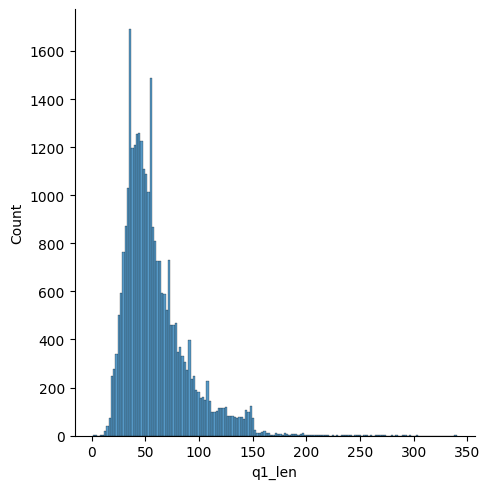

In [ ]:
sns.displot(new_df['q1_len'])
print('Minimum Characters in Question ',new_df['q1_len'].min())
print('Maximum Characters in Question ',new_df['q1_len'].max())
print('Average Number of Character in Questions ',int(new_df['q1_len'].mean()))

Minimum Characters in Question  1
Maximum Characters in Question  73
Average Number of Character in Questions  10


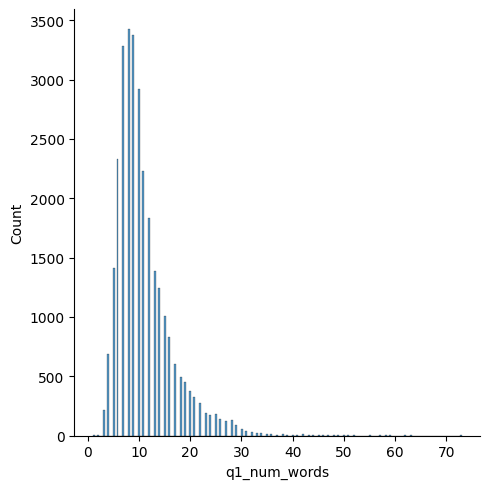

In [ ]:
sns.displot(new_df['q1_num_words'])
print('Minimum Characters in Question ',new_df['q1_num_words'].min())
print('Maximum Characters in Question ',new_df['q1_num_words'].max())
print('Average Number of Character in Questions ',int(new_df['q1_num_words'].mean()))

In [ ]:
# Analysis on Question 2

Minimum Characters in Question  10
Maximum Characters in Question  1169
Average Number of Character in Questions  60


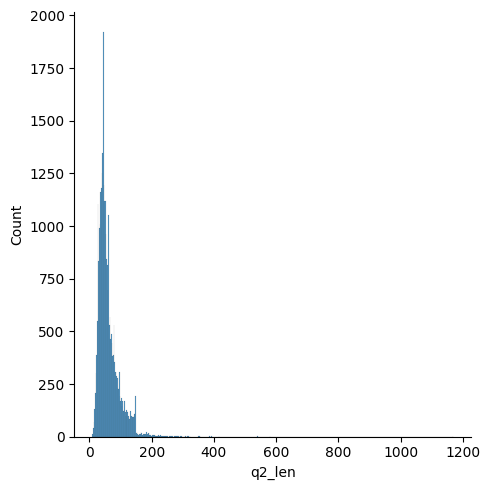

In [ ]:
sns.displot(new_df['q2_len'])
print('Minimum Characters in Question ',new_df['q2_len'].min())
print('Maximum Characters in Question ',new_df['q2_len'].max())
print('Average Number of Character in Questions ',int(new_df['q2_len'].mean()))

Minimum Characters in Question  2
Maximum Characters in Question  228
Average Number of Character in Questions  11


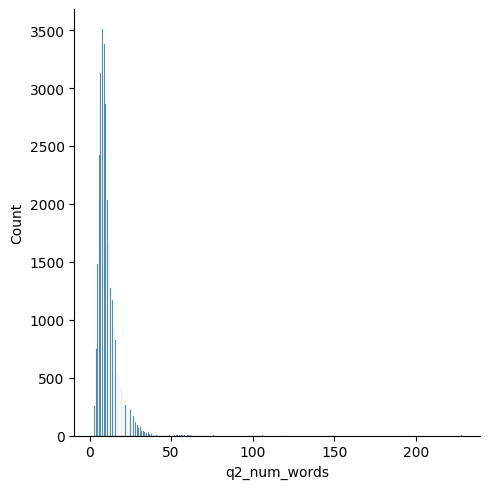

In [ ]:
sns.displot(new_df['q2_num_words'])
print('Minimum Characters in Question ',new_df['q2_num_words'].min())
print('Maximum Characters in Question ',new_df['q2_num_words'].max())
print('Average Number of Character in Questions ',int(new_df['q2_num_words'].mean()))

In [ ]:
# Common words

<ipython-input-19-b43229a8083b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non_duplicate')
<ipython-input-19-b43229a8083b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplic

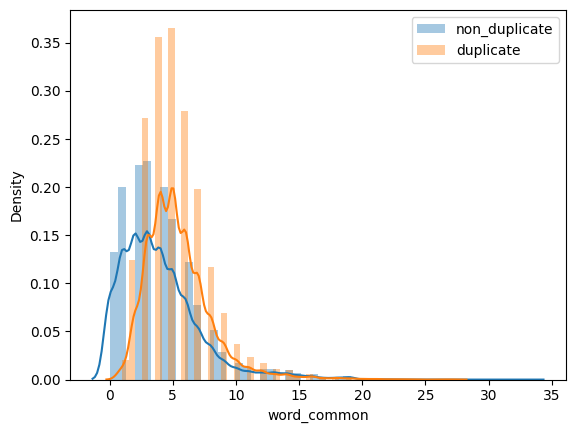

In [ ]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-20-598457230a70>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non_duplicate')
<ipython-input-20-598457230a70>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicat

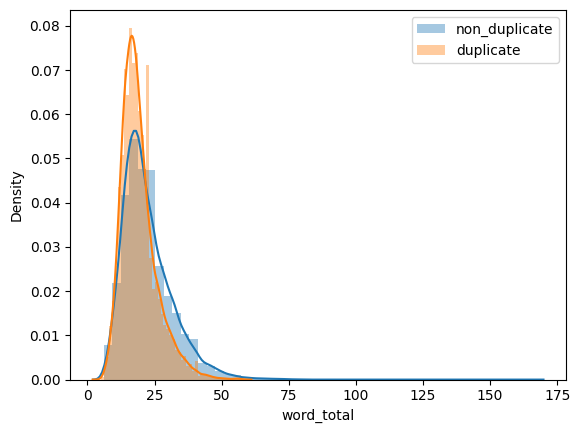

In [ ]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-21-33c34331d935>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['words_share'],label='non_duplicate')
<ipython-input-21-33c34331d935>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['words_share'],label='duplic

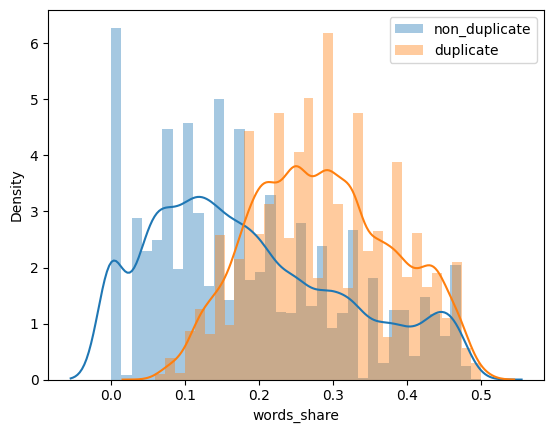

In [ ]:
sns.distplot(new_df[new_df['is_duplicate']==0]['words_share'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['words_share'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
question_df=new_df[[ 'question1','question2']]
question_df.head()

question1  \
33282   Who are the most influential women who changed...   
166813  Is Quora a liberal site? Are all conservative ...   
204400  What is a free VPN that can be used with Netfl...   
92925   Which colleges I CAN get with 542 marks in NEE...   
148254                What are some tips for managing up?   

                                                question2  
33282   Who were some of the most influential women in...  
166813              Is Quora a socialist liberal website?  
204400            Is Cyberghost the best FREE VPN to use?  
92925   What is the total number of hormones in the hu...  
148254          What does it mean to "manage up" at work?

In [ ]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
33282              1      57      55            10            10            5   
166813             1      79      37            14             6            4   
204400             0      66      39            14             8            4   
92925              0      53      55            11            11            1   
148254             0      35      41             7             9            1   

        word_total  words_share  
33282           19         0.26  
166813          19         0.21  
204400          22         0.18  
92925           21         0.05  
148254          16         0.06

### Applying Bag of words on New Features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Merging the Texts
question= list(question_df['question1']) + list(question_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(question).toarray(),2)

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=question_df.index)
temp_df2=pd.DataFrame(q2_arr,index=question_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape


(30000, 6000)

In [ ]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
33282              1      57      55            10            10            5   
166813             1      79      37            14             6            4   
204400             0      66      39            14             8            4   
92925              0      53      55            11            11            1   
148254             0      35      41             7             9            1   

        word_total  words_share  0  1  ...  2990  2991  2992  2993  2994  \
33282           19         0.26  0  0  ...     0     0     0     0     0   
166813          19         0.21  0  0  ...     0     0     0     0     0   
204400          22         0.18  0  0  ...     0     0     0     0     0   
92925           21         0.05  0  0  ...     0     0     0     0     0   
148254          16         0.06  0  0  ...     0     0     0     0     0   

        2995  2996  2997  2998  2999  
33282      0     0     0     0     0  
166813     0     0     0     0     0  
204400     0     0     0     0     0  
92925      0     0     0     0     0  
148254     0     0     0     0     0  

[5 rows x 6008 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.25,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred=rf.predict(X_test)
rf_score=accuracy_score(y_pred,y_test)
print("Accuracy score for Random FOrrest is:",rf_score)


Accuracy score for Random FOrrest is: 0.7646666666666667


In [ ]:
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred=xgb.predict(X_test)
xgb_score=accuracy_score(y_pred,y_test)
print('Accuracy Score for XGBoostClassifier is :' ,xgb_score)

Accuracy Score for XGBoostClassifier is : 0.7606666666666667


# Advance Feature Enginnering for boosting Accuracy

**1. Token Features**
  *   cwc_min: This is the ratio of the number of common words to the length of the smaller question
  *   cwc_max: This is the ratio of the number of common words to the length of the larger question
  *  csc_min: This is the ratio of the number of common stop
  words to the smaller stop word count among the two questions
  *   csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
  *   ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
  *   ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
  *   last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
  *   first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

**2. Length Based Features**

  *   mean_len: Mean of the length of the two questions (number of words)
  *   abs_len_diff: Absolute difference between the length of the two questions (number of words)
  *   longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

**3. Fuzzy Features**
* fuzz_ratio: fuzz_ratio score from fuzzywuzzy
* fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
* token_sort_ratio: token_sort_ratio from fuzzywuzzy
* token_set_ratio: token_set_ratio from fuzzywuzzy




















Understanding Tokens, stopwords.

Tokens : Number of words in a sentence is called Token

Words : Words refer to unique words in a sentence.

Stopwords : stopwords are words that are commonly used in a language and can be safely ignored when processing natural language data.

Eg: 'What is the best thing about New York City?'

Here we have **10 Tokens**. "What", "is", "the", "best", "thing", "about", "New" "York" "City" "?".

There are **8 words**: "What", "is", "the", "best", "thing", "about", "New York City".




**Fuzzy Features **

1. fuzz_ratio: The fuzz_ratio is a score calculated by fuzzywuzzy's fuzz_ratio function. It measures the similarity between two strings by computing the Levenshtein distance, which is the minimum number of single-character edits (insertions, deletions, or substitutions) required to transform one string into another. The fuzz_ratio returns a value between 0 and 100, where 0 indicates no similarity and 100 indicates an exact match.

2. fuzz_partial_ratio: The fuzz_partial_ratio is another score provided by fuzzywuzzy. It calculates the similarity between two strings by considering partial matches. It compares substrings of different lengths within the strings and calculates the best match score. The fuzz_partial_ratio also returns a value between 0 and 100, where 0 indicates no similarity and 100 indicates a perfect match.

3. token_sort_ratio: The token_sort_ratio is a score that takes into account the similarity of words or tokens in two strings, regardless of their original order. It first tokenizes the strings into individual words or tokens, sorts them alphabetically, and then compares the sorted tokens to calculate the similarity. The token_sort_ratio returns a value between 0 and 100, where 0 indicates no similarity and 100 indicates a perfect match.

4. token_set_ratio: The token_set_ratio is another score provided by fuzzywuzzy. It considers the similarity of words or tokens in two strings while ignoring duplicate tokens. It tokenizes the strings, removes duplicate tokens, and then calculates the similarity between the sets of unique tokens. The token_set_ratio returns a value between 0 and 100, where 0 indicates no similarity and 100 indicates a perfect match.

In [ ]:
# Preprocessing the data.

In [ ]:
#Importing New libraries
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def preprocess(q):
  q=str(q).lower().strip()
  # Replacing special characters with their string equivalents
  q=q.replace('%','percent')
  q=q.replace('$','dollar')
  q=q.replace('₹', 'rupee')
  q=q.replace('€', 'euro')
  q=q.replace('@','at')

  # According to Dicussion on Kaggle word Math appears too many times and doesnt have signifiance.
  q=q.replace('[math]','')
  #replacing some numbers with string equivalents
  q=q.replace(',000,000,000','b')
  q=q.replace(',000,000,','m')
  q=q.replace('000','k')
  q = re.sub(r'([0-9]+)000000000', r'\1b', q)
  q = re.sub(r'([0-9]+)000000', r'\1m', q)
  q = re.sub(r'([0-9]+)000', r'\1k', q)
  # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
  contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

  q_decontracted = []

  for word in q.split():
      if word in contractions:
          word = contractions[word]

      q_decontracted.append(word)

  q = ' '.join(q_decontracted)
  q = q.replace("'ve", " have")
  q = q.replace("n't", " not")
  q = q.replace("'re", " are")
  q = q.replace("'ll", " will")

  # Removing HTML tags
  q = BeautifulSoup(q)
  q = q.get_text()

  # Remove punctuations
  pattern = re.compile('\W')
  q = re.sub(pattern, ' ', q).strip()

  return q

 **Code Explanation :**
1. q = re.sub(r'([0-9]+)000000000', r'\1b', q): This line replaces occurrences of numbers followed by nine zeros (representing billions) with the number followed by 'b'. For example, if the string contains '1000000000', it will be replaced with '1b'.

2. q = re.sub(r'([0-9]+)000000', r'\1m', q): This line replaces occurrences of numbers followed by six zeros (representing millions) with the number followed by 'm'. For example, if the string contains '5000000', it will be replaced with '5m'.

3. q = re.sub(r'([0-9]+)000', r'\1k', q): This line replaces occurrences of numbers followed by three zeros (representing thousands) with the number followed by 'k'. For example, if the string contains '2000', it will be replaced with '2k'.

In [ ]:
# Trying our Prepocess funtion
preprocess('The bowl was filled with 3000 fruits.')

'the bowl was filled with 3k fruits'

In [ ]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)


In [ ]:
new_df.head(2)

id    qid1    qid2                                 question1  \
271222  271222  389266  389267        how do you lace your ll bean boots   
332801  332801  138518  309806  how do i give my wife a squirting orgasm   

                                                question2  is_duplicate  \
271222         what is the best way way to tie bean boots             0   
332801  what is the best way to give a woman the best ...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
271222      34      42             8            10            2          17   
332801      40      69             9            16            3          23   

        words_share  
271222         0.12  
332801         0.13

In [ ]:
# updating same features but on pre processed data

In [ ]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [ ]:
new_df.head(2)

id    qid1    qid2                                 question1  \
271222  271222  389266  389267        how do you lace your ll bean boots   
332801  332801  138518  309806  how do i give my wife a squirting orgasm   

                                                question2  is_duplicate  \
271222         what is the best way way to tie bean boots             0   
332801  what is the best way to give a woman the best ...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
271222      34      42             8            10            2          17   
332801      40      69             9            16            3          23   

        words_share  
271222         0.12  
332801         0.13

In [ ]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row : len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row : len(row.split(" ")))

In [ ]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2= set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return len(w1&w2)
new_df['word_common']=new_df.apply(common_words,axis=1)

In [ ]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2= set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1)+ len(w2))

In [ ]:
new_df['word_total']= new_df.apply(total_words,axis=1)
new_df.head(2)

id    qid1    qid2                                 question1  \
271222  271222  389266  389267        how do you lace your ll bean boots   
332801  332801  138518  309806  how do i give my wife a squirting orgasm   

                                                question2  is_duplicate  \
271222         what is the best way way to tie bean boots             0   
332801  what is the best way to give a woman the best ...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
271222      34      42             8            10            2          17   
332801      40      69             9            16            3          23   

        words_share  
271222         0.12  
332801         0.13

In [ ]:
new_df['words_share']= round(new_df['word_common']/new_df['word_total'],2)
new_df.head(2)

id    qid1    qid2                                 question1  \
271222  271222  389266  389267        how do you lace your ll bean boots   
332801  332801  138518  309806  how do i give my wife a squirting orgasm   

                                                question2  is_duplicate  \
271222         what is the best way way to tie bean boots             0   
332801  what is the best way to give a woman the best ...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
271222      34      42             8            10            2          17   
332801      40      69             9            16            3          23   

        words_share  
271222         0.12  
332801         0.13

In [ ]:
# Creating Advance Features

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Explanation :**

In some cases, when the denominator becomes zero (e.g., when the lengths of the token sets are zero), a division operation would result in an error. By adding SAFE_DIV=0.0001 to the denominator, the division will not encounter a zero value, preventing division by zero errors.

token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV):

 This line calculates the ratio of the number of common words between q1_tokens and q2_tokens to the minimum length of the two token sets. The result represents the proportion of common words relative to the smaller token set.

In [ ]:
token_features = new_df.apply(fetch_token_features,axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
new_df.head(5)

id    qid1    qid2  \
271222  271222  389266  389267   
332801  332801  138518  309806   
154774  154774  242622  242623   
349755  349755  478452  478453   
49523    49523   88137   88138   

                                                question1  \
271222                 how do you lace your ll bean boots   
332801           how do i give my wife a squirting orgasm   
154774               what is plagiarism why is it illegal   
349755  besides army rangers green berets and navy sea...   
49523   where can i find the vehicle registration numb...   

                                                question2  is_duplicate  \
271222         what is the best way way to tie bean boots             0   
332801  what is the best way to give a woman the best ...             0   
154774  if we have freedom of speech why is plagiarism...             1   
349755  which one of these two should i consider to jo...             0   
49523               what is a vehicle registration number             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
271222      34      42             8            10  ...          17   
332801      40      69             9            16  ...          23   
154774      36      54             7            10  ...          16   
349755     129      75            22            15  ...          37   
49523       58      37            11             6  ...          17   

        words_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
271222         0.12  0.666644  0.399992  0.000000  0.000000  0.249997   
332801         0.13  0.499988  0.333328  0.199996  0.124998  0.333330   
154774         0.25  0.999950  0.499988  0.499988  0.333328  0.571420   
349755         0.14  0.499994  0.249998  0.166664  0.142855  0.333331   
49523          0.18  0.999967  0.599988  0.000000  0.000000  0.499992   

         ctc_max  last_word_eq  first_word_eq  
271222  0.199998           1.0            0.0  
332801  0.187499           0.0            0.0  
154774  0.399996           1.0            0.0  
349755  0.227272           0.0            0.0  
49523   0.272725           0.0            0.0  

[5 rows x 21 columns]

In [ ]:
new_df.shape

(30000, 21)

In [ ]:
# Creating Length Based Features

In [ ]:
!pip install distance


import distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=4dc05b0feae0bbf6d52e26ec0cc199300ae91e8a75710e3b31a34c8e1c0acc6b
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


In [ ]:
length_features = new_df.apply(fetch_length_features, axis=1)
new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

**Explanation :**


new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features)): This line creates a new column in new_df called 'abs_len_diff'. It assigns the first element (index 0) of each tuple in the length_features list to this column. The map function is used to apply the lambda function to each element of length_features and convert the result into a list.

new_df['mean_len'] = list(map(lambda x: x[1], length_features)): This line creates another new column in new_df called 'mean_len'. It assigns the second element (index 1) of each tuple in the length_features list to this column. Again, the map function is used to apply the lambda function and convert the result into a list.

new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features)): This line creates yet another new column in new_df called 'longest_substr_ratio'. It assigns the third element (index 2) of each tuple in the length_features list to this column. The map function is used with the lambda function to extract the desired element and convert the result into a list.

In [ ]:
!pip install fuzzywuzzy
# Fuzzy Features
from fuzzywuzzy import fuzz

In [ ]:
def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

**Explanation : **

fuzzy_features[0] = fuzz.QRatio(q1, q2): This line calculates the QRatio between the strings q1 and q2 using the fuzz.QRatio() function from fuzzywuzzy. The QRatio is a simple fuzzy matching algorithm that measures the similarity between two strings.

fuzzy_features[1] = fuzz.partial_ratio(q1, q2): This line calculates the partial_ratio between the strings q1 and q2 using the fuzz.partial_ratio() function from fuzzywuzzy. The partial_ratio is another fuzzy matching algorithm that considers partial matches between strings.

fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2): This line calculates the token_sort_ratio between the strings q1 and q2 using the fuzz.token_sort_ratio() function from fuzzywuzzy. The token_sort_ratio is a fuzzy matching algorithm that compares the sorted tokens of the strings.

fuzzy_features[3] = fuzz.token_set_ratio(q1, q2): This line calculates the token_set_ratio between the strings q1 and q2 using the fuzz.token_set_ratio() function from fuzzywuzzy. The token_set_ratio is a fuzzy matching algorithm that compares the unique tokens of the strings.

In [ ]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

#### Analysis of Min Plots .

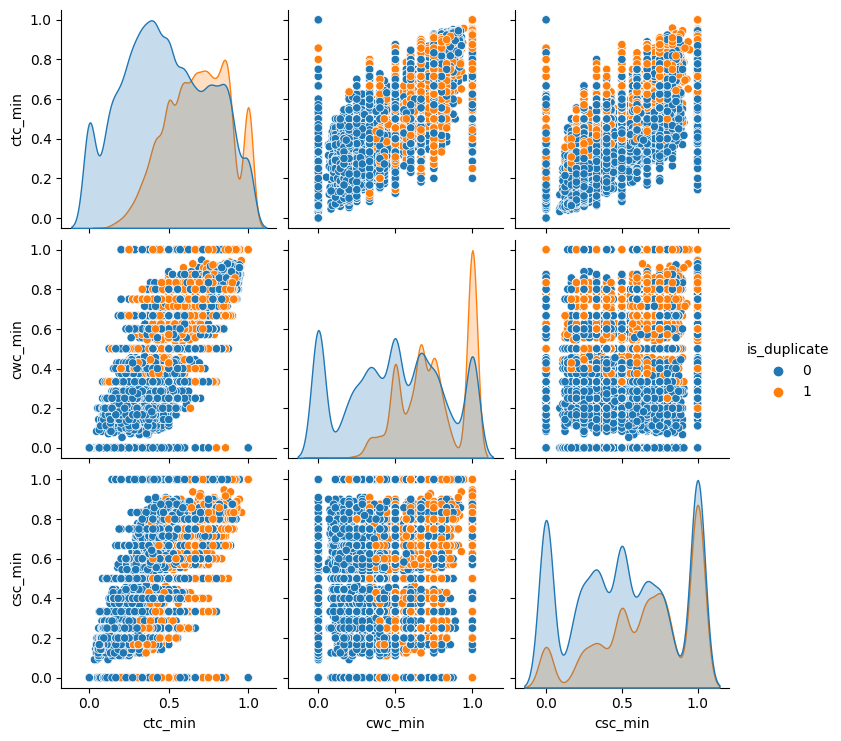

In [ ]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

**Analysis of Plots :**

The plots provide valuable insights into the potential features for distinguishing between duplicate and non-duplicate questions. In the Ctc Min plot, we observe some overlap between the two categories. However, despite this overlap, we can still differentiate between duplicates and non-duplicates based on this feature. This suggests that Ctc Min could be a potentially useful feature for our model.

Similarly, in the CWC Min and CSC Min plots, we also observe some overlapping regions. However, even with this overlap, we can still discern patterns that help distinguish between duplicate and non-duplicate questions. This indicates that both CWC Min and CSC Min have the potential to be informative features for our model.

Overall, these plots demonstrate that although there is some overlap between the duplicate and non-duplicate categories, certain features such as Ctc Min, CWC Min, and CSC Min exhibit patterns that can aid in distinguishing between the two categories. These insights provide valuable guidance for feature selection and model development in our project.

#### Analysis of Max Plots.

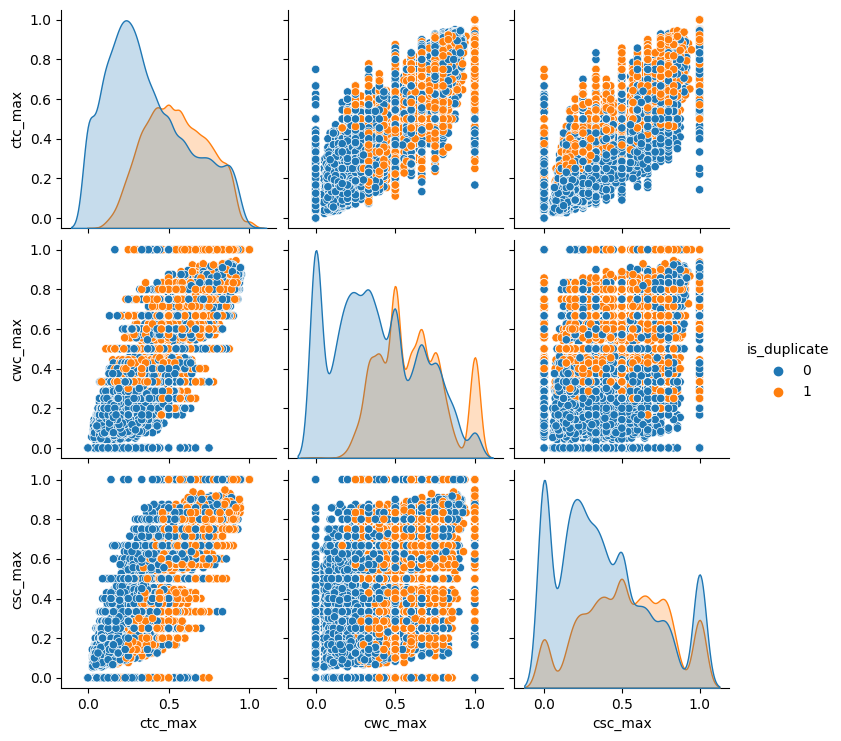

In [ ]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')


#### Analysis of Last word and Firt word Plots.

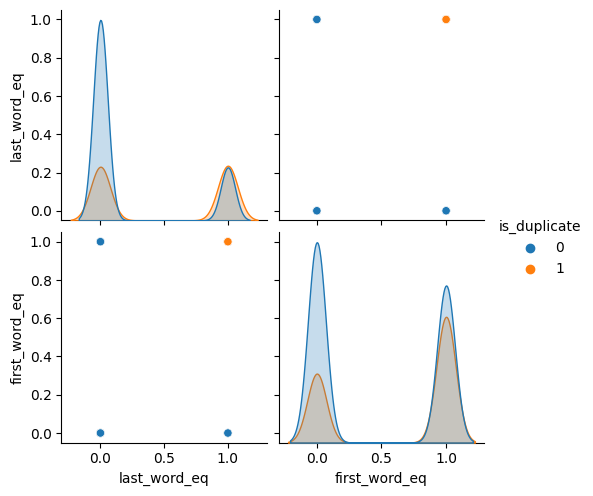

In [ ]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')


**Analysis of the Plot:**

Based on the plot, we can conclude that if the last words of two questions are different, there is a very high chance that the questions are not duplicates. The same applies to the first words of the questions. In simpler terms, when the words at the end or beginning of a question are not the same, it strongly suggests that the questions are not duplicates of each other. This information is important for creating a model that can accurately determine if questions are duplicates or not. By focusing on the first and last words of the questions, we can improve the model's ability to identify duplicate and non-duplicate questions.

#### Analysis of  Length based Features plots

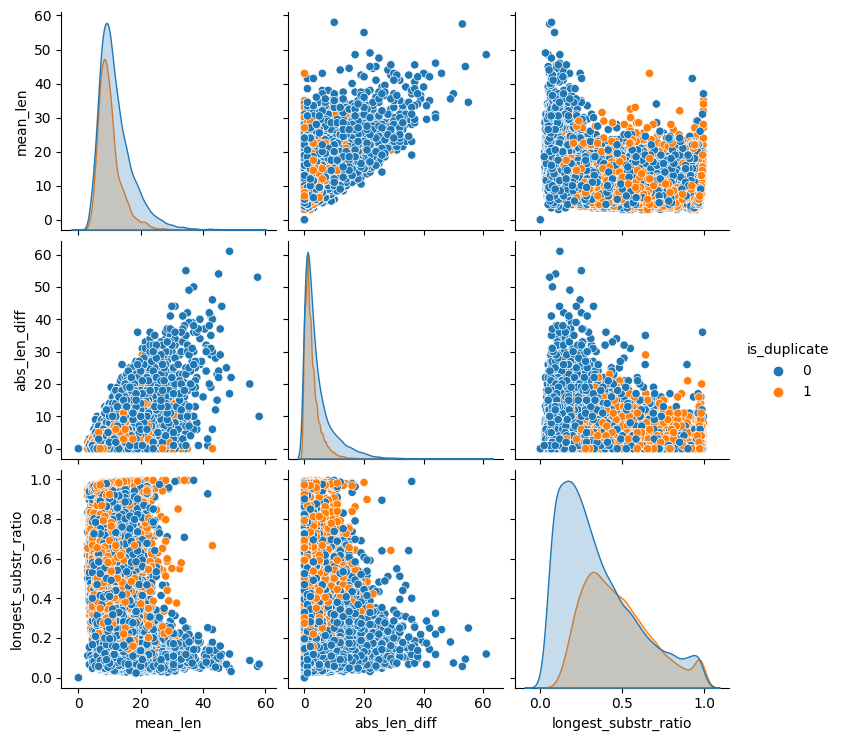

In [ ]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')


**Analysis of the Plot:**

From the features we examined, the mean length and absolute length of the questions don't show a lot of significance in distinguishing between duplicate and non-duplicate questions. However, the longest substring ratio feature provides a good explanation of the data.



#### Analysis of Fuzzy Plots.

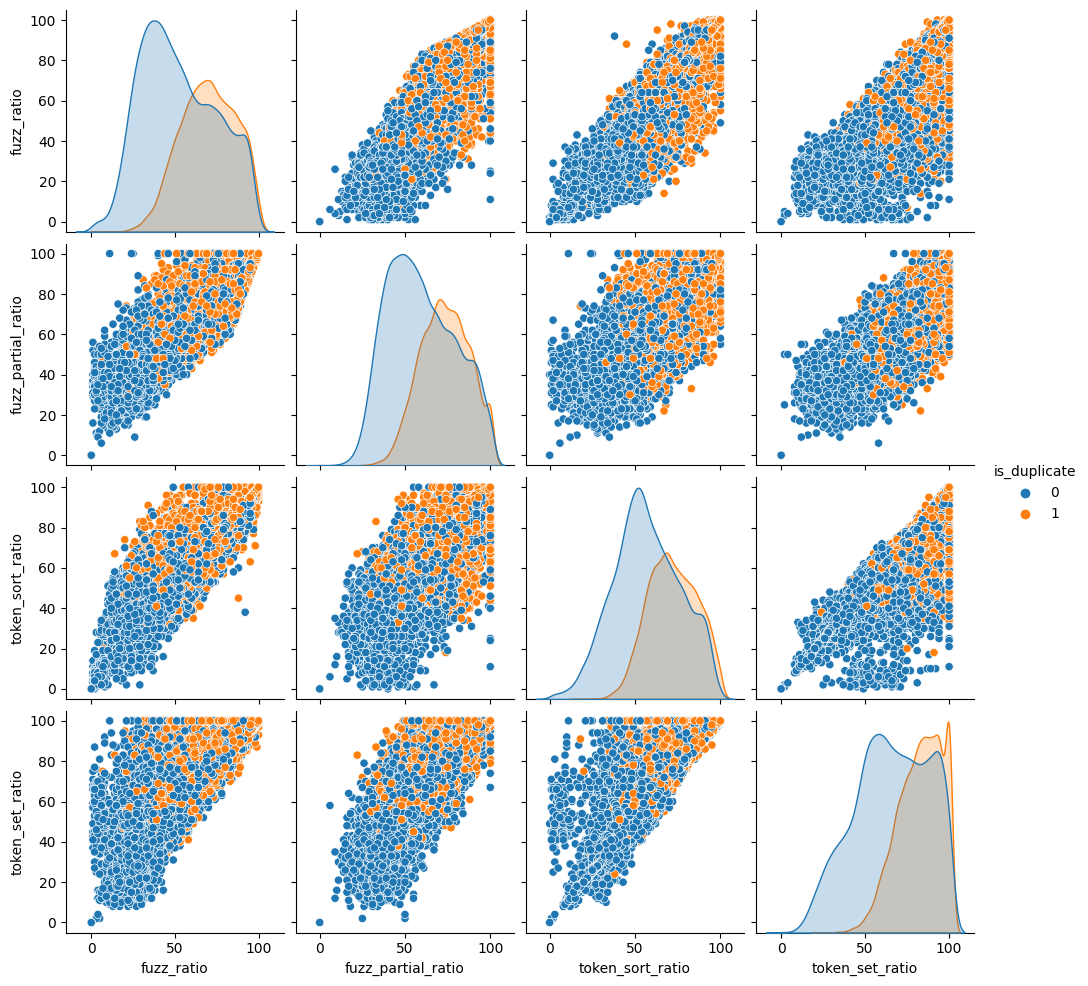

In [ ]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')


Fuzzy plots provide helpful information to tell the difference between duplicate and non-duplicate questions. Even though there might be some overlap, these plots show patterns that can indicate duplication.

### Applying TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimentions.

**For better Understanding of TSNE please refer to this**
[Video](https://www.youtube.com/watch?v=NEaUSP4YerM&pp=ygUEdHNuZQ%3D%3D)

In [ ]:

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.066s...
[t-SNE] Computed neighbors for 30000 samples in 8.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

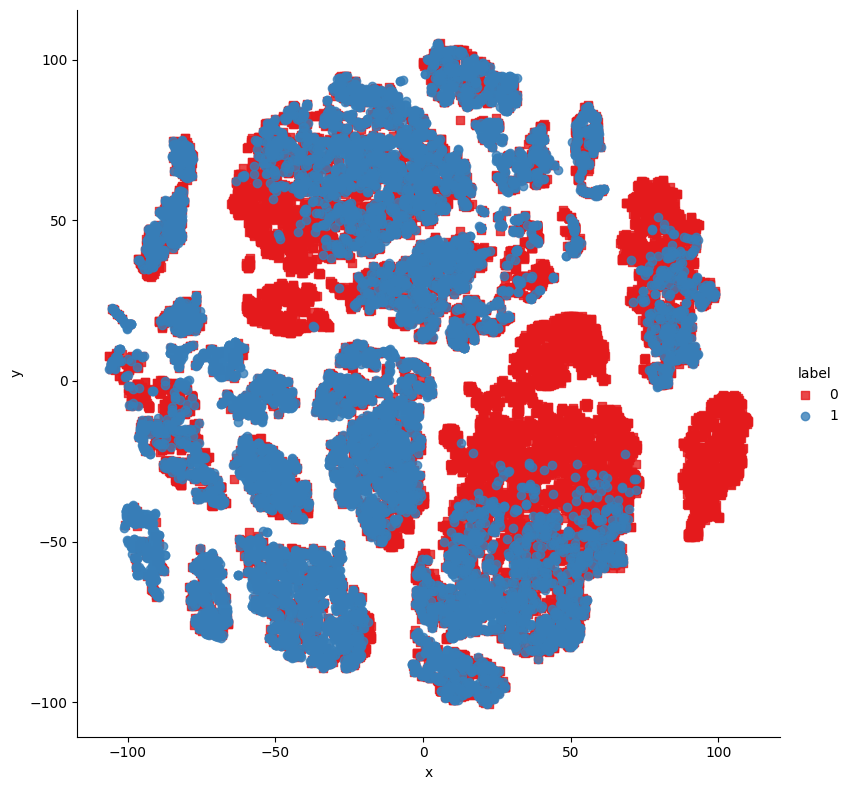

In [ ]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8,palette="Set1",markers=['s','o'])

In [ ]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.117s...
[t-SNE] Computed neighbors for 30000 samples in 8.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

**Explanation : **

The code imports the necessary modules from Plotly for creating interactive plots.

The go.Scatter3d class is used to define a 3D scatter plot. The x, y, and z arguments specify the coordinates for the plot, which are taken from the tsne3d variable.

The mode argument is set to 'markers' to indicate that each data point will be represented as a marker.

The marker argument is used to customize the appearance of the markers. It specifies properties such as the size, color, opacity, and line color of the markers.

The data list is created, containing the trace1 scatter plot trace.

The layout dictionary is defined to customize the layout of the plot. It specifies properties such as the height, width, and title of the plot.

The fig dictionary is created, combining the data and layout dictionaries.

The py.iplot function is called to display the interactive plot. The fig dictionary is passed as an argument, and the resulting plot is displayed in the notebook with the specified filename '3DBubble'.

### Modeling the preprocessed Data


In [ ]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
271222                 how do you lace your ll bean boots   
332801           how do i give my wife a squirting orgasm   
154774               what is plagiarism why is it illegal   
349755  besides army rangers green berets and navy sea...   
49523   where can i find the vehicle registration numb...   

                                                question2  
271222         what is the best way way to tie bean boots  
332801  what is the best way to give a woman the best ...  
154774  if we have freedom of speech why is plagiarism...  
349755  which one of these two should i consider to jo...  
49523               what is a vehicle registration number

In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
271222             0      34      42             8            10            2   
332801             0      40      69             9            16            3   
154774             1      36      54             7            10            4   
349755             0     129      75            22            15            5   
49523              0      58      37            11             6            3   

        word_total  words_share   cwc_min   cwc_max  ...   ctc_max  \
271222          17         0.12  0.666644  0.399992  ...  0.199998   
332801          23         0.13  0.499988  0.333328  ...  0.187499   
154774          16         0.25  0.999950  0.499988  ...  0.399996   
349755          37         0.14  0.499994  0.249998  ...  0.227272   
49523           17         0.18  0.999967  0.599988  ...  0.272725   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
271222           1.0            0.0           2.0       9.0   
332801           0.0            0.0           7.0      12.5   
154774           1.0            0.0           3.0       8.5   
349755           0.0            0.0           7.0      18.5   
49523            0.0            0.0           5.0       8.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
271222              0.314286          45                  58   
332801              0.170732          40                  50   
154774              0.405405          53                  79   
349755              0.171053          19                  27   
49523               0.736842          72                  78   

        token_sort_ratio  token_set_ratio  
271222                39               45  
332801                42               49  
154774                62               86  
349755                52               51  
49523                 72               84  

[5 rows x 23 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
271222             0      34      42             8            10            2   
332801             0      40      69             9            16            3   
154774             1      36      54             7            10            4   
349755             0     129      75            22            15            5   
49523              0      58      37            11             6            3   

        word_total  words_share   cwc_min   cwc_max  ...  2990  2991  2992  \
271222          17         0.12  0.666644  0.399992  ...     0     0     0   
332801          23         0.13  0.499988  0.333328  ...     0     0     0   
154774          16         0.25  0.999950  0.499988  ...     0     0     0   
349755          37         0.14  0.499994  0.249998  ...     0     0     0   
49523           17         0.18  0.999967  0.599988  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
271222     0     0     0     0     0     0     0  
332801     0     0     0     0     0     0     0  
154774     0     0     0     0     0     0     0  
349755     0     0     0     0     0     0     0  
49523      0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

### Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7816666666666666

In [ ]:
from sklearn.metrics import confusion_matrix
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3230,  529],
       [ 781, 1460]])

### XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7798333333333334

In [ ]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3153,  606],
       [ 715, 1526]])

# Testing the Data

In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [ ]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [ ]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [ ]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
def query_point_creator(q1,q2):

    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()



    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

#### Testing Model with random questions

In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'

In [ ]:
rf.predict(query_point_creator(q1,q2))

array([0])

# Conclusion .

There are several steps we can take to enhance the performance of the model for duplicate question detection:

1. Increasing the dataset size: A larger dataset can provide more diverse examples, allowing the model to learn better representations and improve its generalization ability.

2. Creating more advanced features: Introducing additional features that capture different aspects of the questions can provide richer information for the model to differentiate between duplicate and non-duplicate pairs.

3. Utilizing TF-IDF or Word2Vec: These techniques can be employed to represent the textual data in a more meaningful way, capturing semantic similarities between words and improving the model's ability to identify duplicate questions.

4. Performing hyperparameter tuning: Fine-tuning the model's hyperparameters can optimize its performance. This can involve adjusting parameters such as learning rate, regularization, or the architecture of the model itself to achieve better results.